<a href="https://colab.research.google.com/github/RicardoHG7/Valores-at-picos/blob/main/Actividad_3_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("2023.csv")
df

,Unnamed: 0,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,...,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,Sin registro
1,1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,Sin registro
2,2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,...,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,...,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,...,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,I,Vigente,Sin registro
393,393,2023-02-01,53560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,...,220.00,0.00,0.0,0.0,0.0,220.00,220.00,I,Vigente,Sin registro
394,394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,...,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,I,Vigente,Sin registro
395,395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,...,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,I,Vigente,Sin registro


In [4]:
#Reemplazamos valores nulos del dataframe con "bfill"
df1 =df.fillna(method="bfill") 

In [5]:
#Corroboramos valores nulos del dataframe
valores_nulos=df1.isnull().sum()
valores_nulos

Unnamed: 0     0
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

In [6]:
#Seleccionar las coumnas en cuantitativas
df1s= df.iloc[ : , 9:17] 
df1s


,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [7]:
#Variables cualitativas 
df2=df.iloc[ : , [1,2,3,4,5,6,7,8,18,19,20]]
df2

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro
393,2023-02-01,53560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,Sin registro
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,Sin registro


In [8]:
df1s = df1s.astype(float)

<Figure size 1500x800 with 0 Axes>

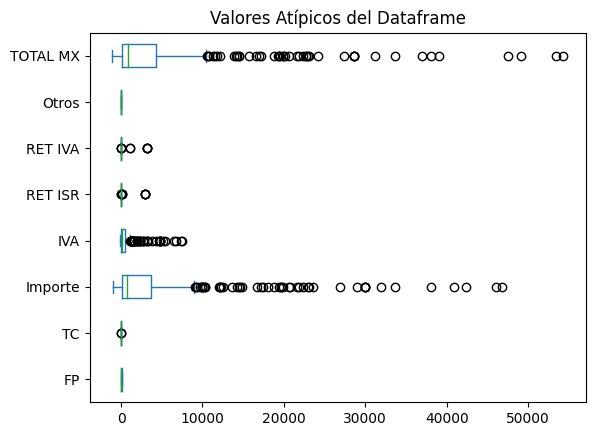

In [9]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df1s.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [10]:
y=df1s
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP            175.075477
TC              4.957143
Importe     26557.244156
IVA          3761.774707
RET ISR       931.175004
RET IVA      1022.471745
Otros           0.000000
TOTAL MX    29218.464899
dtype: float64
Limite inferior permitido FP           -102.813512
TC             -2.774030
Importe    -18708.366775
IVA         -2766.954304
RET ISR      -869.142712
RET IVA      -947.124289
Otros           0.000000
TOTAL MX   -20512.146863
dtype: float64


In [11]:
#Encontramos Ouliers del Dataframe
outliers= df1s[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
DF1= df1s[(y<=Limite_Superior)&(y>=Limite_Inferior)]
DF1

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [13]:
valores_nulos=DF1.isnull().sum()
valores_nulos

FP           0
TC           2
Importe     13
IVA         13
RET ISR      4
RET IVA      6
Otros        0
TOTAL MX     9
dtype: int64

In [14]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=DF1.copy()
data_clean=data_clean.fillna(round(DF1.mean(),1))
data_clean

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [15]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

FP          0
TC          0
Importe     0
IVA         0
RET ISR     0
RET IVA     0
Otros       0
TOTAL MX    0
dtype: int64

In [16]:
Datos_limpios2020 = pd.concat([df2,DF1], axis=1)
Datos_limpios2020

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,2023-02-01,53560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,Sin registro,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,Sin registro,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [17]:
Datos_limpios2020.to_csv("2023porDataFrame.csv")
from google.colab import files   
files.download("2023porDataFrame.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=DF1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP           246.00000
TC             1.00000
Importe     7190.16750
IVA          919.85625
RET ISR        0.00000
RET IVA        0.00000
Otros          0.00000
TOTAL MX    8503.49625
dtype: float64
Limite inferior permitido FP          -146.00000
TC             1.00000
Importe    -4159.61250
IVA         -551.91375
RET ISR        0.00000
RET IVA        0.00000
Otros          0.00000
TOTAL MX   -4906.41375
dtype: float64


In [19]:
#Encontramos Outliers del Dataframe
outliers_iqr= DF1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8454.37,1352.7,NaN,NaN,NaN,9807.07
...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,18071.52,NaN,NaN,NaN,NaN,18753.92
395,NaN,NaN,14472.32,NaN,NaN,NaN,NaN,14472.32


In [20]:
#Obtenemos datos limpios del Dataframe
data3_iqr= DF1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
1,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3
4,99.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.0
394,3.0,1.0,NaN,682.40,0.0,0.0,0.0,NaN
395,5.0,1.0,NaN,0.00,0.0,0.0,0.0,NaN


In [21]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

FP           0
TC           2
Importe     64
IVA         57
RET ISR      9
RET IVA      9
Otros        0
TOTAL MX    63
dtype: int64

In [22]:
DF2=DF1.copy()
DF2=DF2.fillna(round(DF1.mean(),1))
DF2

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [23]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=DF2.isnull().sum()
valores_nulos

FP          0
TC          0
Importe     0
IVA         0
RET ISR     0
RET IVA     0
Otros       0
TOTAL MX    0
dtype: int64

In [24]:
Datos_limpios2020_iqr = pd.concat([df2,DF2], axis=1)
Datos_limpios2020_iqr

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,Sin registro,P,Vigente,Sin registro,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00
393,2023-02-01,53560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,I,Vigente,Sin registro,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,I,Vigente,Sin registro,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32


In [25]:
Datos_limpios2020_iqr.to_csv("2023porDataFrame_iqr.csv")
from google.colab import files   
files.download("2023porDataFrame_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>